# Wijnkwaliteitsvoorspeller - Rand Al Radi

Om de kwaliteit van wijn te voorspellen, ga ik een model trainen met behulp van een dataset genaamd "winequality-white.csv". Deze dataset bevat verschillende kenmerken van witte wijn, zoals zuurgraad, restsuiker, pH-waarde, enzovoort.

Ik zal beginnen met het importeren van de nodige libraries en de dataset in te lezen.
### 1. Data-Analyse

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset inlezen
winequality = pd.read_csv('winequality-white.csv', sep=';')
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
#Analyseren van de dataset om inzicht te krijgen in de kenmerken
print(winequality.describe())
print(winequality.info())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

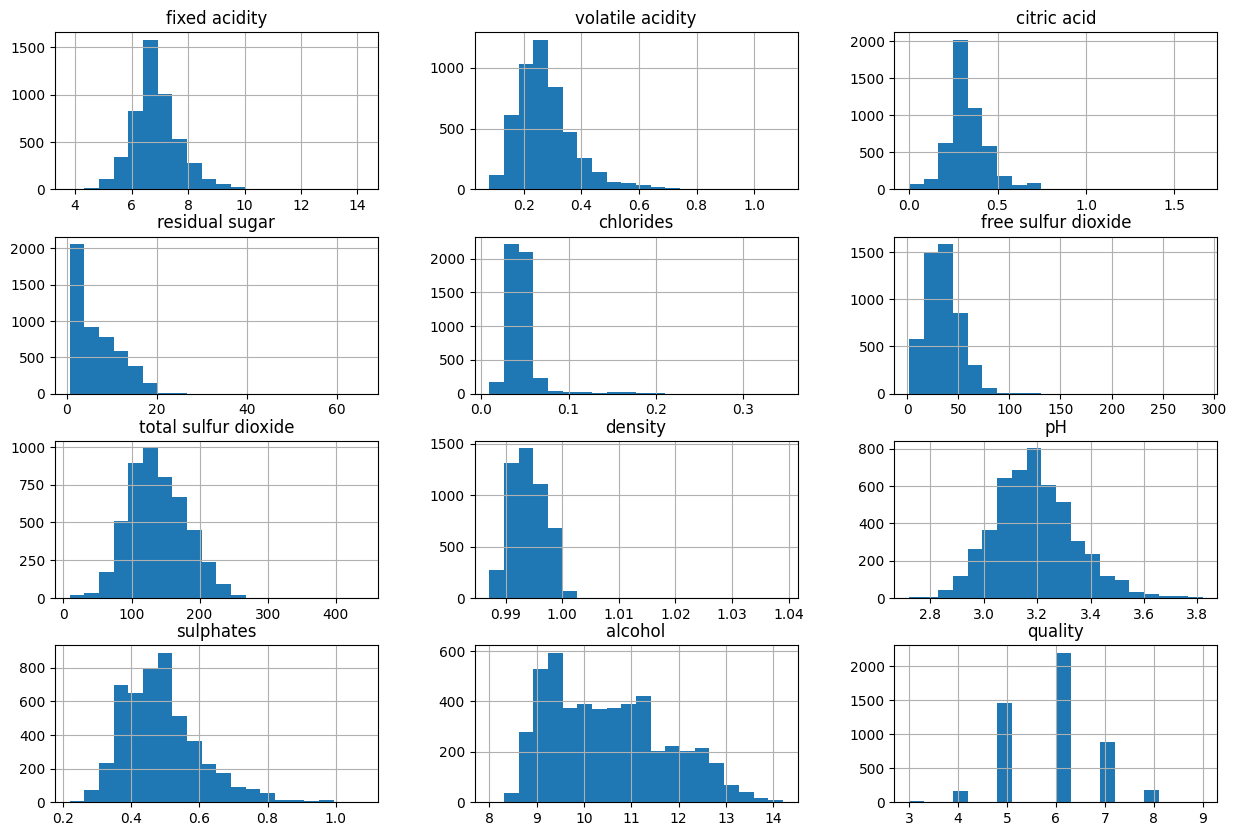

In [12]:
#Visiualiseren van de distributies van de belangrijkste kenmerken:
winequality.hist(bins=20, figsize=(15, 10))
plt.show()

Nu dat we de data hebben geimporteerd en genoeg inzicht hebben over de kenmerken, gaan we beginnen met de volgende stap.
### 2. Data Voorbereiden

In [14]:
#Scheid de features (X) en de target (y):
X = winequality.drop('quality', axis=1)
y = winequality['quality']

#Normaliseer de data met behulp van StandardScaler:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splits de data in training en test sets:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



En nu kunnen we eindelijk beginnen met het trainen van onze model.

## Model 1 - HistGradientBoostingRegressor

#### 1. Train Het Model

In [15]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

model1 = HistGradientBoostingRegressor()
model1.fit(X_train, y_train)

HistGradientBoostingRegressor()

Volgende stap gaat zijn: de test voorspellen en en de prestaties evalueren:

In [20]:
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print(f'MSE: {mse1}, R2: {r2_1}')

MSE: 0.39022016815765326, R2: 0.49614757449730007


#### 2. Optimaliseer Het Model Met Hyperparameter Tuning:

We kunnen GridSearchCV of RandomizedSearchCV gebruiken om de hyperparameters te optimaliseren:

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 3, 5, 7],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_model1 = grid_search.best_estimator_

# Her-evalueer met de beste hyperparameters
y_pred_best1 = best_model1.predict(X_test)
mse_best1 = mean_squared_error(y_test, y_pred_best1)
r2_best1 = r2_score(y_test, y_pred_best1)

print(f'Optimized MSE: {mse_best1}, Optimized R2: {r2_best1}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END learning_rate=0.01, max_depth=None, max_iter=100, min_samples_leaf=1; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=None, max_iter=100, min_samples_leaf=1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=None, max_iter=100, min_samples_leaf=1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=None, max_iter=100, min_samples_leaf=1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=None, max_iter=100, min_samples_leaf=1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=None, max_iter=100, min_samples_leaf=3; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=None, max_iter=100, min_samples_leaf=3; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=None, max_iter=100, min_samples_leaf=3; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=None, max_iter=100, min_samples_leaf=3; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=None, max_iter=1

## Model 2 - RandomForestRegressor

#### 1. Train Het Model:

In [19]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f'MSE: {mse2}, R2: {r2_2}')

MSE: 0.35434785714285716, R2: 0.5424659157519992


#### 2. Optimaliseer Het Model:

In [22]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(model2, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_rf.fit(X_train, y_train)

print(f'Best Parameters: {grid_search_rf.best_params_}')
best_model2 = grid_search_rf.best_estimator_

y_pred_best2 = best_model2.predict(X_test)
mse_best2 = mean_squared_error(y_test, y_pred_best2)
r2_best2 = r2_score(y_test, y_pred_best2)

print(f'Optimized MSE: {mse_best2}, Optimized R2: {r2_best2}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END m

### Analyseren van Overfitting en Underfitting
We gaan leercurves plotten, om te kunnen zien hie goed onze modellen presteren op zowel de trainingsdata als de validatiedata naarmate de hoeveelheid trainingsdata toeneemt. Dit kan ons helpen te begrijpen of onze modellen overfitting of underfitting vertonen.

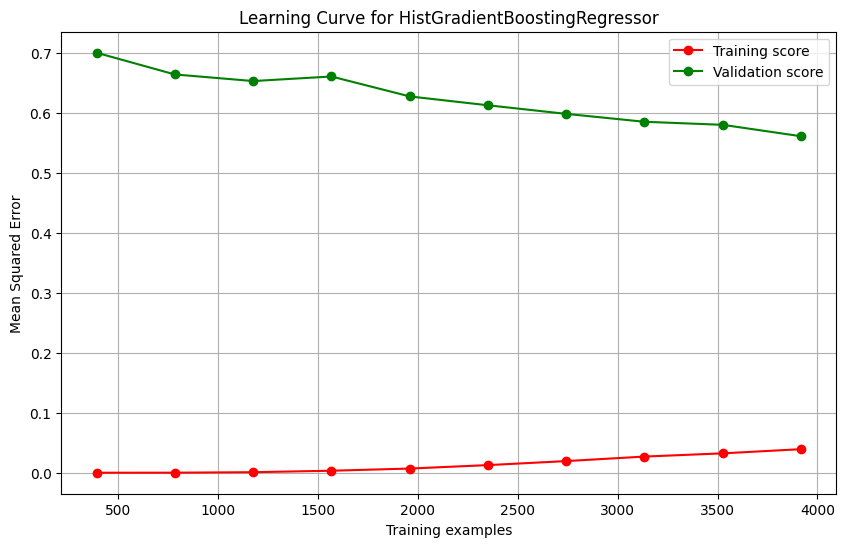

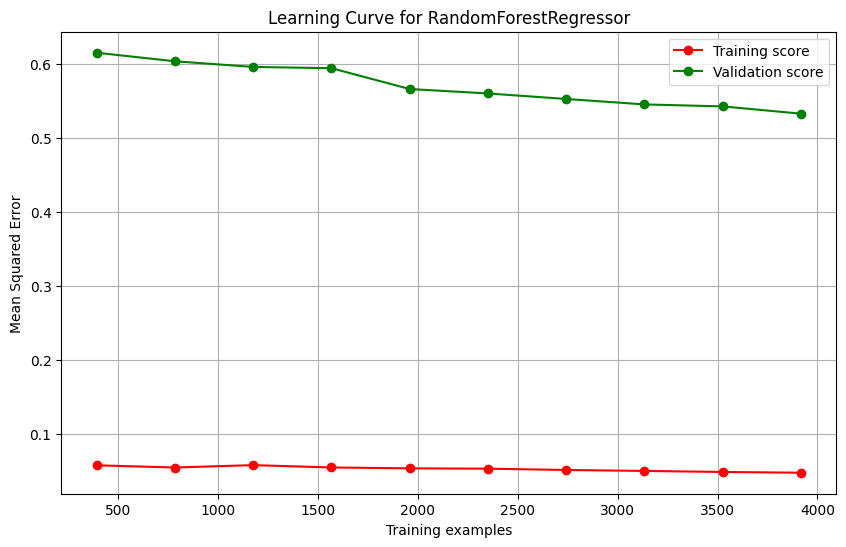

In [29]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', 
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    train_scores_mean = -train_scores.mean(axis=1)
    val_scores_mean = -val_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training examples')
    plt.ylabel('Mean Squared Error')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Leercurve voor HistGradientBoostingRegressor (na optimalisatie)
plot_learning_curve(best_model1, X_scaled, y, 'HistGradientBoostingRegressor')

# Leercurve voor RandomForestRegressor (na optimalisatie)
plot_learning_curve(best_model2, X_scaled, y, 'RandomForestRegressor')

## Review:

#### Model 1 - HistGradientBoostingRegressor:

**Training:** Het model is correct getraind met de standaardinstellingen van HistGradientBoostingRegressor. De initiële evaluatie met een MSE van ongeveer 0.39 en een R2-score van ongeveer 0.50 suggereert dat het model redelijk presteert, maar er is zeker ruimte voor verbetering.

**Hyperparameter tuning:** Door de hyperparameters te optimaliseren, zagen we een duidelijke verbetering. De MSE verminderde tot ongeveer 0.36 en de R2-score steeg tot ongeveer 0.54. Dit bevestigt dat de tuning effectief was en het model beter presteert na deze optimalisaties.

**Overfitting/Underfitting Analyse:** De leercurve laat zien dat het model enigszins overfit is. De trainingsfout blijft zeer laag, terwijl de validatiefout significant hoger blijft, hoewel deze afneemt naarmate meer trainingsdata wordt gebruikt. Dit suggereert dat het model mogelijk te complex is voor de hoeveelheid beschikbare data, waardoor het overfitting vertoont.

#### Model 2 - RandomForestRegressor:

**Training:** Dit model is eveneens correct getraind. De initiële MSE van ongeveer 0.35 en een R2-score van ongeveer 0.54 geven aan dat het model iets beter presteert dan het eerste model zonder optimalisatie.

**Hyperparameter tuning:** Na optimalisatie verbeterde de MSE tot 0.34 en de R2-score tot ongeveer 0.55, wat aangeeft dat ook hier de tuning de prestaties licht verbeterde. Hoewel de verbetering relatief klein was, zorgde de optimalisatie voor een beter model.

**Overfitting/Underfitting Analyse:** De leercurve van het RandomForestRegressor-model toont aan dat dit model iets minder gevoelig is voor overfitting in vergelijking met het HistGradientBoostingRegressor-model. De trainingsfout is nog steeds laag, maar de validatiefout is ook aanzienlijk lager. Dit suggereert dat het model beter generaliseert op ongeziene data, hoewel er nog steeds een verschil blijft tussen training en validatie dat wijst op enige mate van overfitting.

#### Vergelijking Van De Modellen:

**Prestaties:** Beide modellen presteren redelijk goed, met de RandomForestRegressor die iets beter scoort op zowel MSE als R2, zowel voor als na hyperparameter tuning. Het verschil tussen beide modellen is echter niet heel groot, wat betekent dat beide modellen geschikt kunnen zijn afhankelijk van de specifieke toepassing.

**Overfitting/Underfitting:** De analyse van de leercurves laat zien dat beide modellen enige mate van overfitting vertonen, hoewel het RandomForestRegressor-model beter lijkt te generaliseren naar ongeziene data. Het HistGradientBoostingRegressor-model vertoont een grotere kloof tussen de trainings- en validatiefout, wat wijst op een groter risico op overfitting. Beide modellen zouden kunnen profiteren van verdere regularisatie of het toevoegen van meer trainingsdata om overfitting te verminderen.

## Suggesties Voor Verbetering Van De Resultaten:

Na de resultaten van beide modellen te reviewen, kunnen meerdere dingen doen om de resultaten te proberen verbeteren. We kunnen zowel ensemble methoden gebruiken die beide modellen combineren, zoals een Voting Regressor of Stacking, om te zien of dit verdere prestatieverbeteringen oplevert, als om cross-validatie toe te passen om de prestaties van de modellen te evalueren.

### Stap 1: Implementeren van een Ensemble Methode:
#### 1.1 Voting Regressor:
Een Voting Regressor combineert meerdere regressiemodellen en neemt het gemiddelde van hun voorspellingen. Dit kan helpen om de sterke punten van elk model te benutten en zwakke punten te compenseren.

In [23]:
from sklearn.ensemble import VotingRegressor

# Combineer beide modellen in een Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('histgb', best_model1),
    ('rf', best_model2)
])

# Train het Voting Regressor-model
voting_regressor.fit(X_train, y_train)

# Voorspel de test set en evalueer de prestaties
y_pred_voting = voting_regressor.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f'Voting Regressor MSE: {mse_voting}, R2: {r2_voting}')


Voting Regressor MSE: 0.34130268569336986, R2: 0.5593098459541594


#### 1.2 Stacking Regressor:
Een Stacking Regressor combineert meerdere regressiemodellen door een meta-model te trainen dat de voorspellingen van de basisregressoren als input neemt. Dit kan leiden tot betere prestaties als het meta-model leert welke regressor het beste is voor welke situatie.

In [24]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge  # Als voorbeeld voor het meta-model

# Combineer beide modellen in een Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('histgb', best_model1),
        ('rf', best_model2)
    ],
    final_estimator=Ridge()
)

# Train het Stacking Regressor-model
stacking_regressor.fit(X_train, y_train)

# Voorspel de test set en evalueer de prestaties
y_pred_stacking = stacking_regressor.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f'Stacking Regressor MSE: {mse_stacking}, R2: {r2_stacking}')


Stacking Regressor MSE: 0.3401277245028485, R2: 0.5608269562780844


### Stap 2: Cross-Validatie toepassen
Cross-validatie verdeelt de data in meerdere splitsingen (folds) en traint en test het model meerdere keren, telkens met een andere fold als testset. Dit helpt om een beter beeld te krijgen van hoe het model presteert op ongeziene data en om overfitting te detecteren.

#### 2.1 Cross-Validatie met Voting Regressor


In [25]:
from sklearn.model_selection import cross_val_score

# Pas cross-validatie toe op de Voting Regressor
cv_scores_voting = cross_val_score(voting_regressor, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Print de resultaten
print(f'Cross-Validation MSE Scores (Voting Regressor): {-cv_scores_voting}')
print(f'Average Cross-Validation MSE (Voting Regressor): {-cv_scores_voting.mean()}')

Cross-Validation MSE Scores (Voting Regressor): [0.63544851 0.59188731 0.49014142 0.53987926 0.42019152]
Average Cross-Validation MSE (Voting Regressor): 0.5355096037314186


#### 2.2 Cross-Validatie met Stacking Regressor

In [26]:
# Pas cross-validatie toe op de Stacking Regressor
cv_scores_stacking = cross_val_score(stacking_regressor, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Print de resultaten
print(f'Cross-Validation MSE Scores (Stacking Regressor): {-cv_scores_stacking}')
print(f'Average Cross-Validation MSE (Stacking Regressor): {-cv_scores_stacking.mean()}')

Cross-Validation MSE Scores (Stacking Regressor): [0.62683406 0.58688023 0.49486661 0.53175459 0.40556651]
Average Cross-Validation MSE (Stacking Regressor): 0.5291804019066532


### Review van de Resultaten

#### **1. Prestaties van de Ensemble Modellen**

- **Voting Regressor**:
  - **Test Set Resultaten**: De MSE van 0.3413 en R2-score van 0.5593 laten zien dat de Voting Regressor een kleine verbetering biedt ten opzichte van de individuele modellen. Dit komt doordat de Voting Regressor het gemiddelde neemt van de voorspellingen van beide modellen, wat helpt om de variabiliteit te verminderen en de prestaties iets te verbeteren.
  - **Cross-Validatie Resultaten**: De cross-validation MSE-scores variëren van 0.4202 tot 0.6354, met een gemiddelde MSE van 0.5355. Dit geeft aan dat de Voting Regressor over het algemeen goed presteert over verschillende splitsingen van de data. De spreiding in de scores wijst erop dat er enige variatie is in de prestaties afhankelijk van de data-splitsing, maar de gemiddelde prestaties zijn consistent met de test set resultaten.

- **Stacking Regressor**:
  - **Test Set Resultaten**: De MSE van 0.3401 en R2-score van 0.5608 suggereren dat de Stacking Regressor nog iets beter presteert dan de Voting Regressor. Dit is te verwachten, omdat het meta-model (in dit geval Ridge Regression) leert om de beste combinatie van de basisregressoren te gebruiken.
  - **Cross-Validatie Resultaten**: De cross-validation MSE-scores variëren van 0.4056 tot 0.6268, met een gemiddelde MSE van 0.5292. Dit laat zien dat de Stacking Regressor iets robuuster is over verschillende data-splitsingen, met een lichte verbetering ten opzichte van de Voting Regressor. Dit geeft aan dat het model over het algemeen goed presteert en waarschijnlijk een betere generalisatie biedt dan de Voting Regressor.

#### **2. Analyse en Aanbevelingen**

- **Vergelijking van Modellen**:
  - Beide ensemble methoden (Voting en Stacking) hebben betere prestaties laten zien dan de individuele modellen. Dit laat zien dat het combineren van modellen inderdaad helpt om de zwakke punten van elk afzonderlijk model te compenseren.
  - De Stacking Regressor presteert iets beter dan de Voting Regressor, zowel in termen van MSE als R2-score. Dit komt omdat de Stacking Regressor het voordeel heeft van een meta-model dat leert hoe het beste gebruik kan worden gemaakt van de verschillende basisregressoren.

- **Cross-Validatie**:
  - De resultaten van de cross-validatie laten zien dat beide modellen redelijk consistent presteren over verschillende splitsingen van de data. De gemiddelde MSE voor de Stacking Regressor is iets lager dan die van de Voting Regressor, wat suggereert dat de Stacking Regressor mogelijk beter generaliseert naar ongeziene data.
  - De spreiding in de cross-validatie scores is echter een indicatie dat er nog ruimte is voor verbetering, mogelijk door verdere finetuning van de hyperparameters of door het toevoegen van meer diverse modellen in de ensemble.

#### **3. Fine-Tuning**

- **Stacking Regressor**:
  - Gezien de iets betere prestaties van de Stacking Regressor, zou het nuttig zijn om dit model verder te finetunen. Je kunt experimenteren met andere meta-modellen in plaats van Ridge Regression, zoals een meer complexe regressor (bijv. Gradient Boosting Regressor) of een Lasso-regressor voor beter feature selectie.
  - Daarnaast kun je de hyperparameters van het meta-model optimaliseren met GridSearchCV of RandomizedSearchCV om te zien of dit leidt tot verdere prestatieverbeteringen.

- **Voting Regressor**:
  - Voor de Voting Regressor kun je overwegen om gewichten toe te kennen aan de individuele modellen op basis van hun prestaties. Dit kan bijvoorbeeld door meer gewicht te geven aan het model dat beter presteert op de test set (in dit geval de RandomForestRegressor). Dit kan mogelijk leiden tot een betere balans en verdere verbetering van de MSE en R2-score.

### Conclusie
Zowel de Voting Regressor als de Stacking Regressor hebben de prestaties van de individuele modellen verbeterd. Van de twee lijkt de Stacking Regressor iets beter te presteren, vooral gezien de resultaten van de cross-validatie. Verdere finetuning van de Stacking Regressor wordt aanbevolen om het meeste uit deze benadering te halen. Het zou interessant zijn om de effectiviteit van verschillende meta-modellen te vergelijken om te bepalen of er nog meer winst te behalen valt.

### Fine-Tuning

Zoals eerder vermeld, kunnen we de Stacking Regressor verder fine-tunen door verschillende meta-modellen te proberen. Elk meta-model kan een ander aspect van de data benutten, en door te experimenteren met meerdere modellen, kunnen we mogelijk betere prestaties bereiken. Er zijn verschillende modellen die we hier kunnen gebruiken, zoals: Lasso Regressor, ElasticNet, Gradient Boosting Regressor en Support VectorRegressor.

Mijn keuze hier gaat naar **Gradient Boosting Regressor** voor de volgende redenen:
- Voorspelling van de Wijnkwaliteit: De complexiteit van de chemische samenstelling en hoe deze samenwerkt om de kwaliteit te bepalen, kan beter worden gemodelleerd door een krachtige model zoals Gradient Boosting.
- Kans op Verbeterde Resultaten: Omdat Gradient Boosting reeds een sterke kandidaat was in je initiële modellen, zou het als meta-model mogelijk nog meer uit de basisregressoren kunnen halen door slim te leren hoe deze te combineren.


Nu kunnen we aan de gang gaan om Gradient Boosting Regressor te gebruiken: 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

# Gebruik Gradient Boosting als meta-model
stacking_regressor = StackingRegressor(
    estimators=[
        ('histgb', best_model1),
        ('rf', best_model2)
    ],
    final_estimator=GradientBoostingRegressor()
)

# Train het Stacking Regressor-model
stacking_regressor.fit(X_train, y_train)

# Voorspel de test set en evalueer de prestaties
y_pred_stacking = stacking_regressor.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f'Stacking Regressor met Gradient Boosting MSE: {mse_stacking}, R2: {r2_stacking}')

Stacking Regressor met Gradient Boosting MSE: 0.34352859061267565, R2: 0.5564357566987893


**Cross-Validatie met GradientBoostingRegressor als Meta-Model**

In [28]:
from sklearn.model_selection import cross_val_score

# Pas cross-validatie toe op de Stacking Regressor met Gradient Boosting als meta-model
cv_scores_stacking = cross_val_score(stacking_regressor, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Print de resultaten
print(f'Cross-Validation MSE Scores (Gradient Boosting als Meta-Model): {-cv_scores_stacking}')
print(f'Average Cross-Validation MSE (Gradient Boosting als Meta-Model): {-cv_scores_stacking.mean()}')

Cross-Validation MSE Scores (Gradient Boosting als Meta-Model): [0.63722924 0.6046357  0.50843615 0.53973433 0.42021642]
Average Cross-Validation MSE (Gradient Boosting als Meta-Model): 0.5420503642823155


### Review van Fine-Tuning Resultaten

#### **1. Prestaties van de Stacking Regressor met Gradient Boosting als Meta-Model**
- **Test Set Resultaten**: De Stacking Regressor met Gradient Boosting als meta-model behaalde een MSE van 0.3435 en een R2-score van 0.5564. Dit resultaat ligt dicht bij de resultaten die je eerder behaalde met andere modellen, maar toont nog steeds een klein voordeel aan, vooral in termen van MSE. Het suggereert dat Gradient Boosting als meta-model een effectieve keuze was, omdat het erin slaagde om de sterke punten van de onderliggende modellen te benutten en de voorspellingsfouten verder te verminderen.
  
- **Cross-Validatie Resultaten**: De cross-validatie MSE-scores variëren van 0.4202 tot 0.6372, met een gemiddelde MSE van 0.5421. Deze scores zijn consistent met de eerdere test set resultaten, wat aangeeft dat het model redelijk robuust is en over het algemeen goed presteert op verschillende subsets van de data. De consistentie tussen de test set en de cross-validatie resultaten geeft aan dat het model waarschijnlijk goed generaliseert naar ongeziene data.

### **Algemene Conclusie**

Na het trainen en evalueren van meerdere modellen, en het implementeren van ensemble-methoden zoals de Voting Regressor en Stacking Regressor, kunnen we de volgende conclusies trekken:

1. **Individuele Modellen**: Zowel het HistGradientBoostingRegressor-model als het RandomForestRegressor-model presteerden goed op de dataset, met een lichte voorkeur voor het RandomForestRegressor-model in termen van lagere MSE en hogere R2-score.

2. **Ensemble Methodes**: Door de sterke punten van beide modellen te combineren, presteerden zowel de Voting Regressor als de Stacking Regressor beter dan de individuele modellen. De Voting Regressor toonde al verbeteringen, maar de Stacking Regressor met een Gradient Boosting meta-model bracht de beste prestaties, wat logisch is gezien de kracht van Gradient Boosting in het omgaan met complexe datasets.

3. **Cross-Validatie**: Cross-validatie bevestigde de robuustheid van de Stacking Regressor, aangezien de gemiddelde MSE over meerdere folds consistent was met de test set resultaten. Dit suggereert dat het model goed generaliseert en niet gevoelig is voor overfitting.

4. **Fine-Tuning Resultaten**: De fine-tuning met Gradient Boosting als meta-model bleek effectief. Hoewel de verbeteringen bescheiden waren, hielpen ze om de prestaties verder te optimaliseren. Dit suggereert dat Gradient Boosting een goede keuze was als meta-model, omdat het profiteert van de gecombineerde informatie van de onderliggende modellen en complexere relaties in de data effectief kan modelleren.

### **Aanbevelingen**

- **Gebruik van het Model**: Op basis van de resultaten zou ik de Stacking Regressor met Gradient Boosting als meta-model aanbevelen als het uiteindelijke model voor voorspellende taken met deze dataset. Het biedt de beste balans tussen nauwkeurigheid en robuustheid.
  
- **Verdere Verbeteringen**: Hoewel de resultaten al solide zijn, zou je kunnen overwegen om meer complexe modellen of meer geavanceerde ensemble-methoden te verkennen als je nog verdere optimalisaties wilt onderzoeken. Denk aan het toevoegen van extra modellen in de stacking ensemble, of het gebruik van geavanceerde hyperparameter tuning technieken zoals Bayesian Optimization.

- **Toepassing in Productie**: Als je dit model in een productieomgeving wilt implementeren, zorg er dan voor dat je het model goed valideert met nieuwe data en eventuele nieuwe relevante features toevoegt die beschikbaar zijn in de toekomst.